In [1]:
import sys
sys.path.append('../..')  # to go to the main folder of the whole project

from src.data.vol.get_atm_vol_surfs_tenors_dates import get_atm_vol_surfs_tenors_dates
data, uniq_opt_tenors, uniq_swap_tenors = get_atm_vol_surfs_tenors_dates()

# Normalize data
from src.data.vol.normalizer import Normalizer
normalizer = Normalizer()
data_norm = normalizer.normalize(data)

### Find best latent space dimension

1
2
3
4
5
6
8
10
13
16
20
25


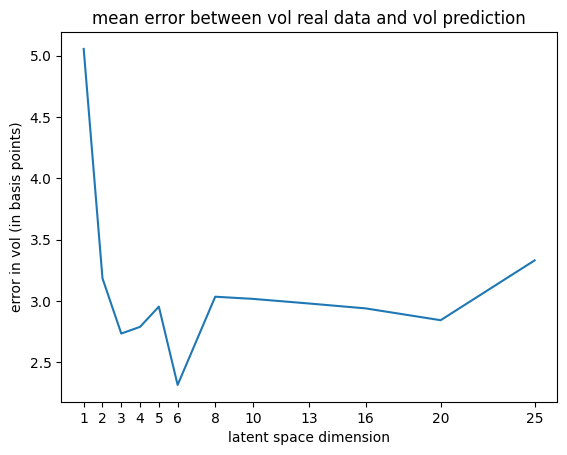

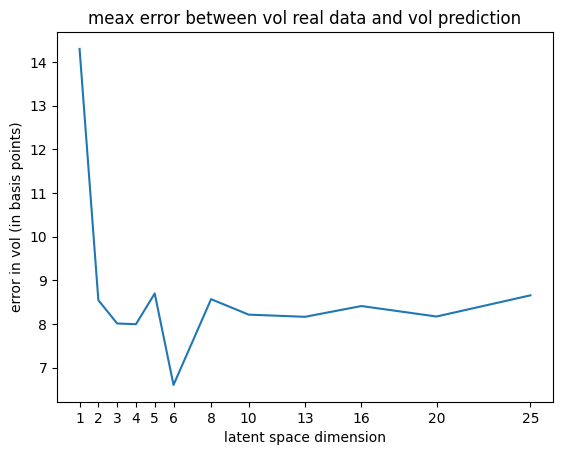

In [16]:
from src.models.vae_vanilla import VaeVanilla
from src.visualization.plot_history_of_losses import plot_history_of_losses
import numpy as np

lat_space = np.array([1, 2, 3, 4, 5, 6, 8, 10, 13, 16, 20, 25]) # np.arange(1, 30)
errors_mean = []
errors_max = []

for i, lat_val in enumerate(lat_space):
    print(lat_val)
    vae = VaeVanilla(input_shape=data_norm.shape[1:],
                     hidden_layers_nodes=[200, 100, 100, 50],
                     latent_space_dim=lat_val,
                     loss_type='mse',
                     beta=0.0002)
    vae.compile(optimizer='adam')
    history = vae.fit(data_norm, 
                      epochs=20,
                      batch_size=16,
                      verbose=0)
    # plot_history_of_losses(history)

    predictions = normalizer.denormalize(vae.predict(x=data_norm, verbose=0))

    avg_errors = np.zeros(len(predictions))
    max_errors = np.zeros(len(predictions))

    for i, val in enumerate(data):
        diff = val - predictions[i]
        avg_errors[i] = ((diff**2).mean()**0.5)  # error is deviation from zero (not from mean)
        max_errors[i] = ((diff**2).max()**0.5)  # error is deviation from zero (not from mean)

    errors_mean.append(avg_errors.mean())
    errors_max.append(max_errors.mean())

import matplotlib.pyplot as plt

plt.plot(lat_space, errors_mean)
plt.title('mean error between vol real data and vol prediction')
plt.ylabel('error in vol (in basis points)')
plt.xticks(lat_space)
plt.xlabel('latent space dimension')
plt.show()

plt.plot(lat_space, errors_max)
plt.title('max error between vol real data and vol prediction')
plt.ylabel('error in vol (in basis points)')
plt.xticks(lat_space)
plt.xlabel('latent space dimension')
plt.show()

### Choose 

-----------
latent space dimension is 1
-----------

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - kl_loss: 5.0072e-06 - reconstruction_loss: 14.9307 - total_loss: 14.9304
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - kl_loss: 3.2182e-04 - reconstruction_loss: 11.4207 - total_loss: 11.4208
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - kl_loss: 0.0016 - reconstruction_loss: 11.0953 - total_loss: 11.0966
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - kl_loss: 0.0017 - reconstruction_loss: 11.0923 - total_loss: 11.0938
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0016 - reconstruction_loss: 11.0911 - total_loss: 11.0925
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - kl_loss: 0.0016 - reconstruction_loss: 11.0912 - total_loss: 11.0925
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - kl_loss: 0.0016 - reconstruction_loss: 11.0891 - total_loss: 11.0904
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - kl_loss: 0.0015 - recons

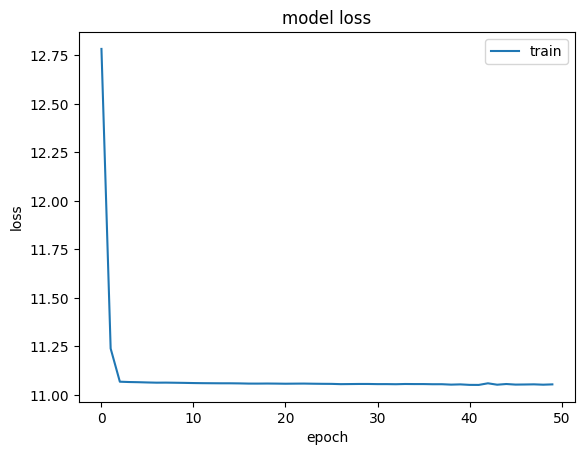

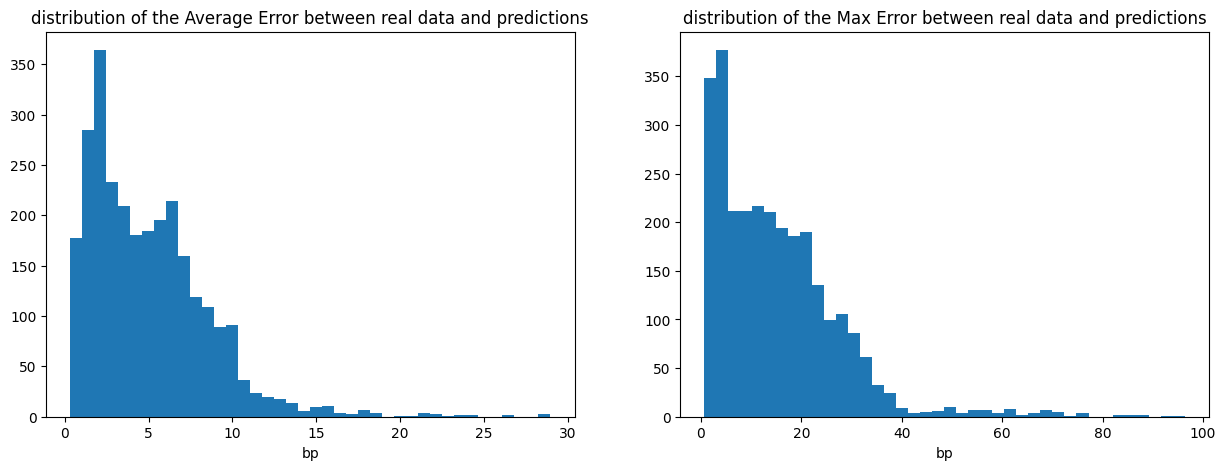

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


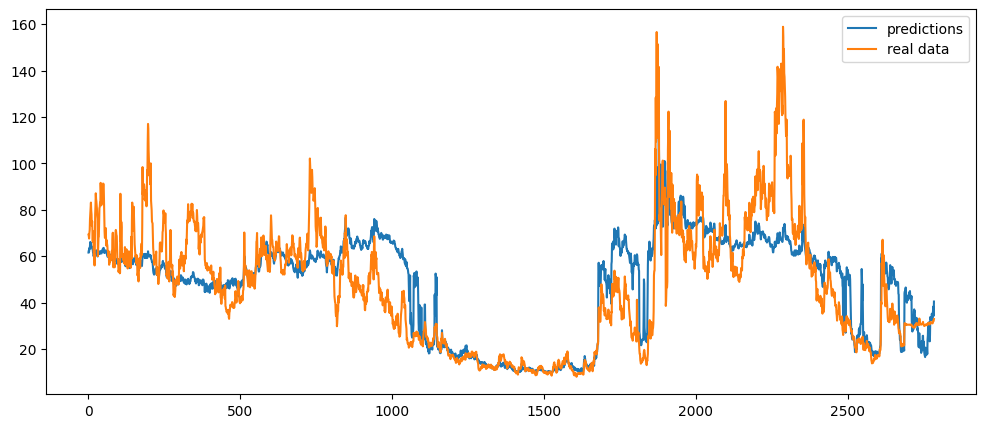

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step


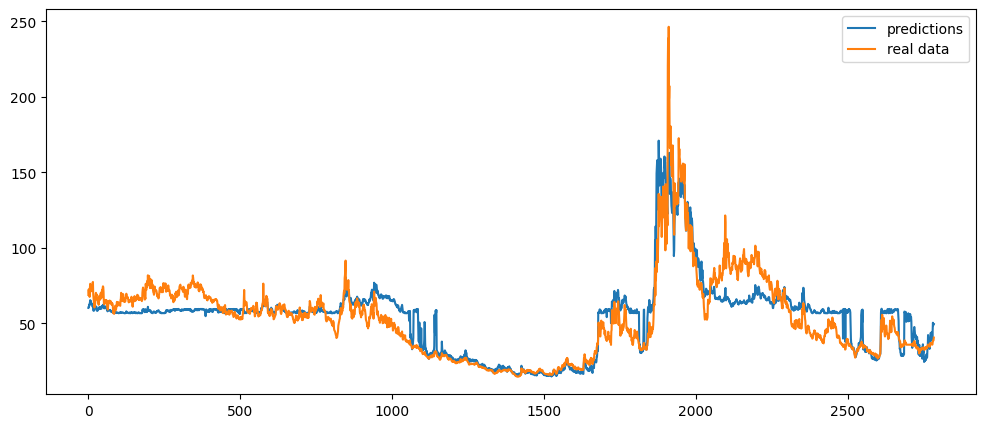

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step


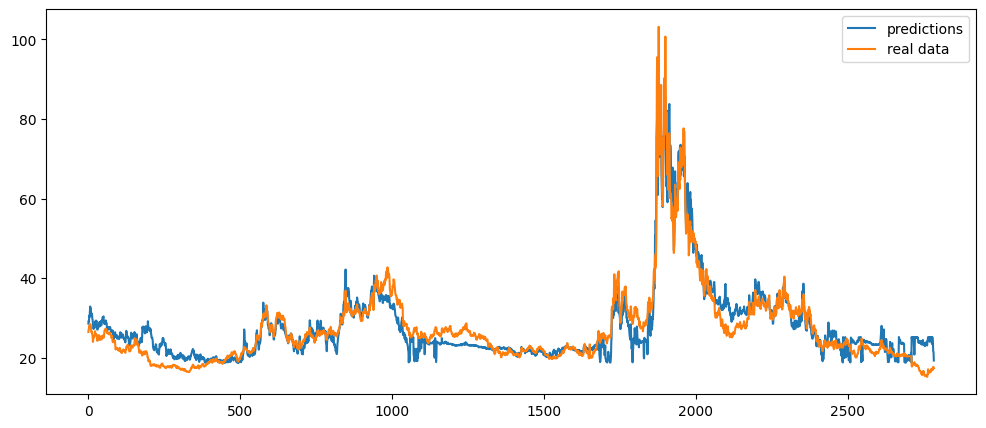

-----------
latent space dimension is 2
-----------
Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - kl_loss: 1.0647e-04 - reconstruction_loss: 14.7756 - total_loss: 14.7754
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 6.0826e-05 - reconstruction_loss: 11.6351 - total_loss: 11.6350
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0031 - reconstruction_loss: 11.3551 - total_loss: 11.3579  
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0101 - reconstruction_loss: 11.1311 - total_loss: 11.1409
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0085 - reconstruction_loss: 11.1174 - total_loss: 11.1257
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0070 - reconstruction_loss: 11.1073 - total_loss: 11.1141
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0064 - reconstruction_loss: 11.0973 - total_loss: 11.1035
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0053 - recon

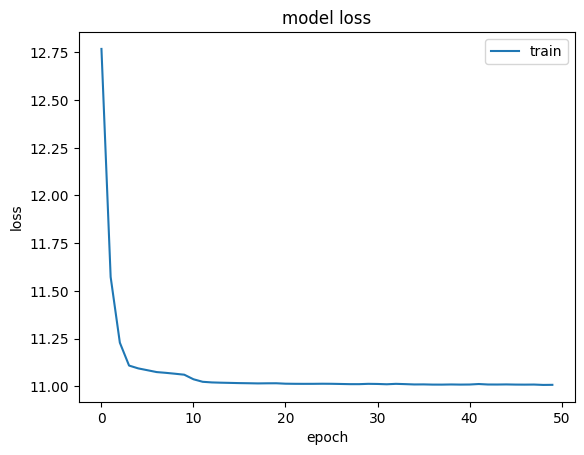

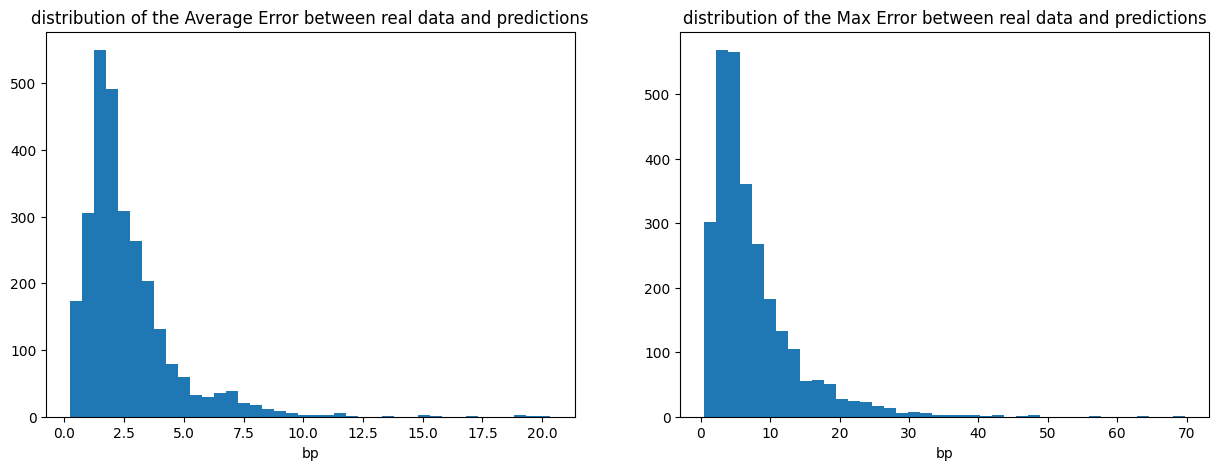

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step


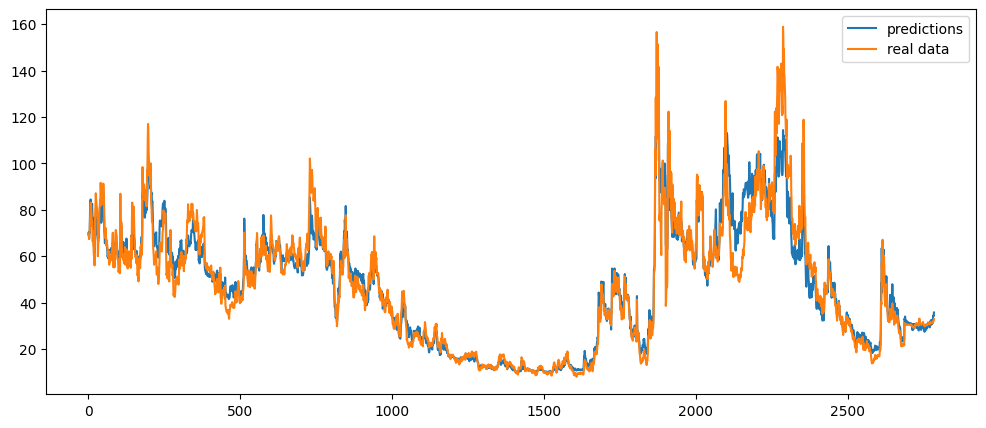

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step


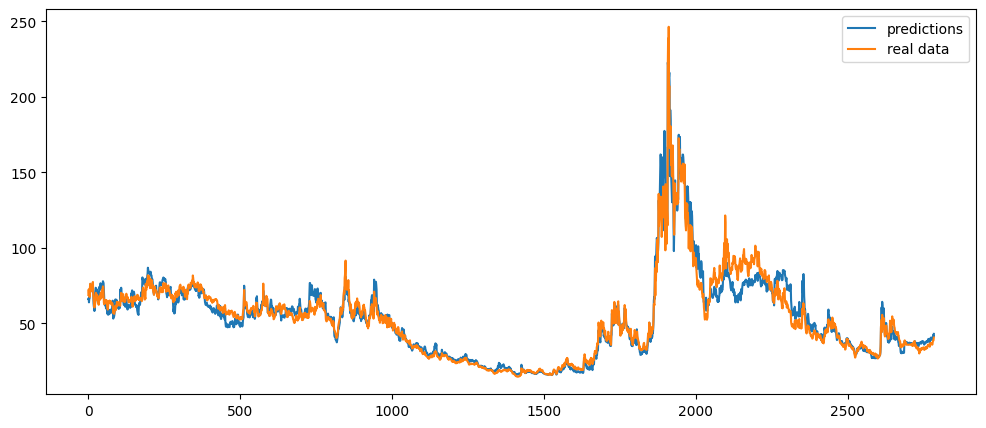

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step


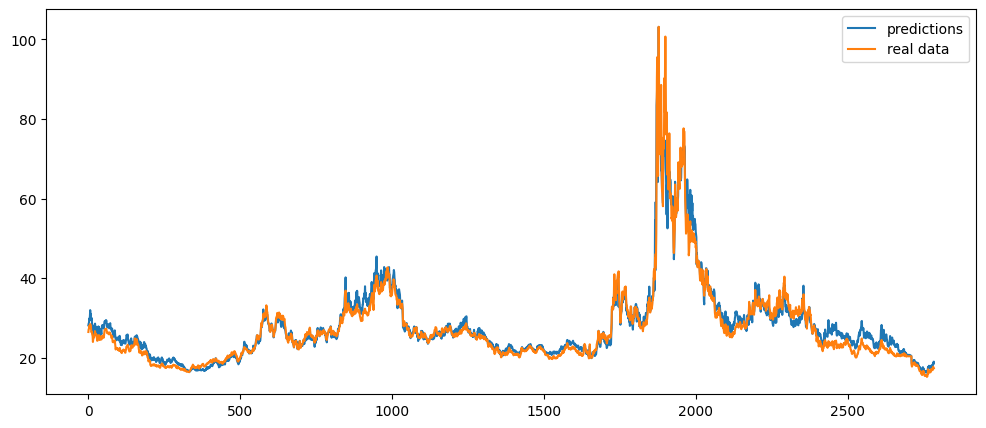

-----------
latent space dimension is 3
-----------
Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - kl_loss: 8.0608e-06 - reconstruction_loss: 14.5817 - total_loss: 14.5814
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 5.4998e-06 - reconstruction_loss: 11.6625 - total_loss: 11.6622
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 7.0688e-04 - reconstruction_loss: 11.4998 - total_loss: 11.5002
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0042 - reconstruction_loss: 11.2627 - total_loss: 11.2666
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0041 - reconstruction_loss: 11.1223 - total_loss: 11.1261
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0031 - reconstruction_loss: 11.1054 - total_loss: 11.1082
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0024 - reconstruction_loss: 11.1004 - total_loss: 11.1026
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0022 - rec

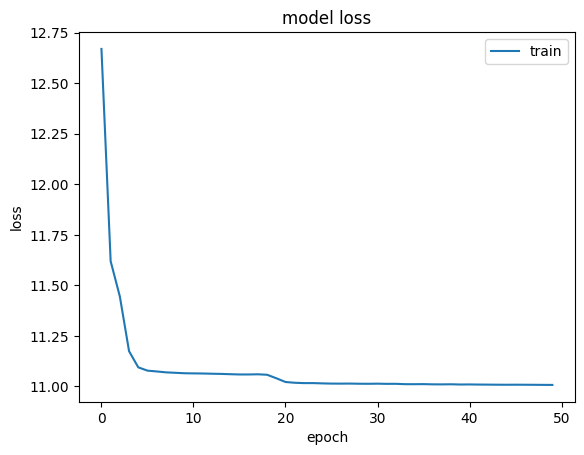

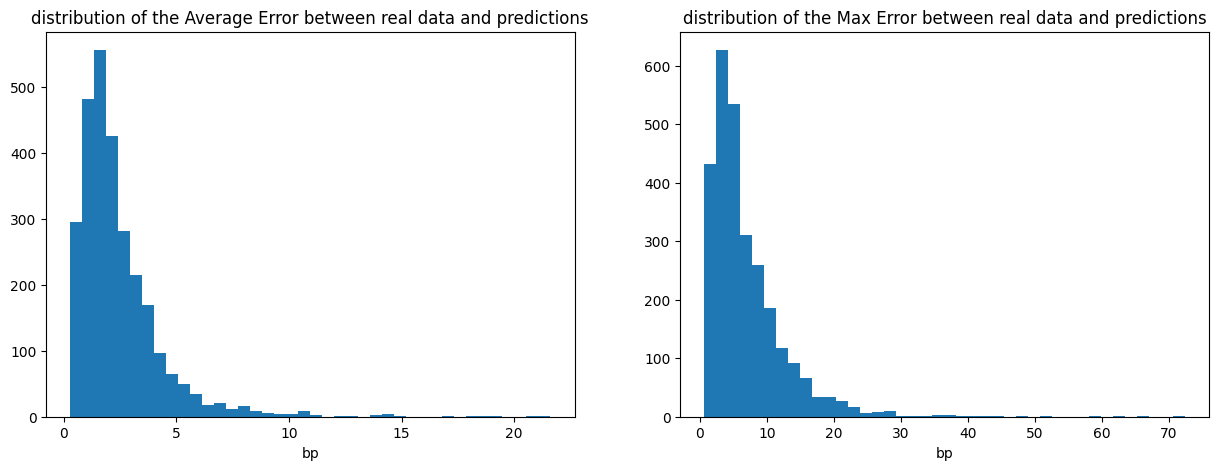

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step


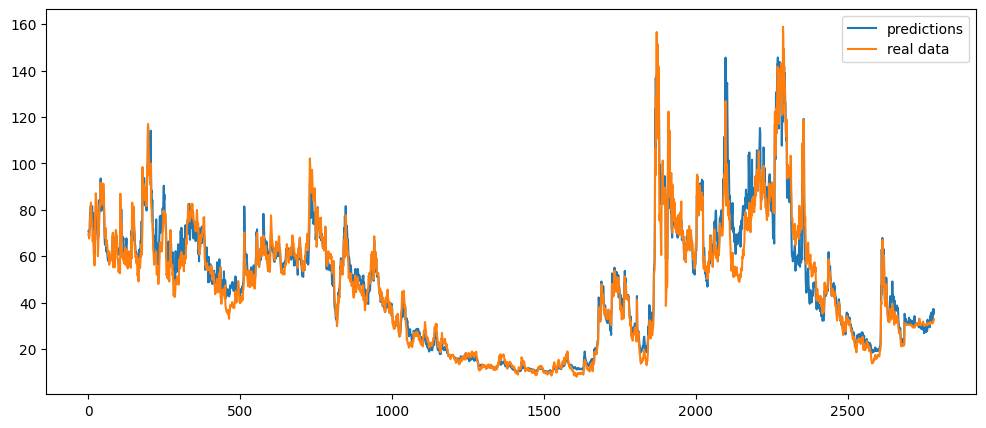

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step


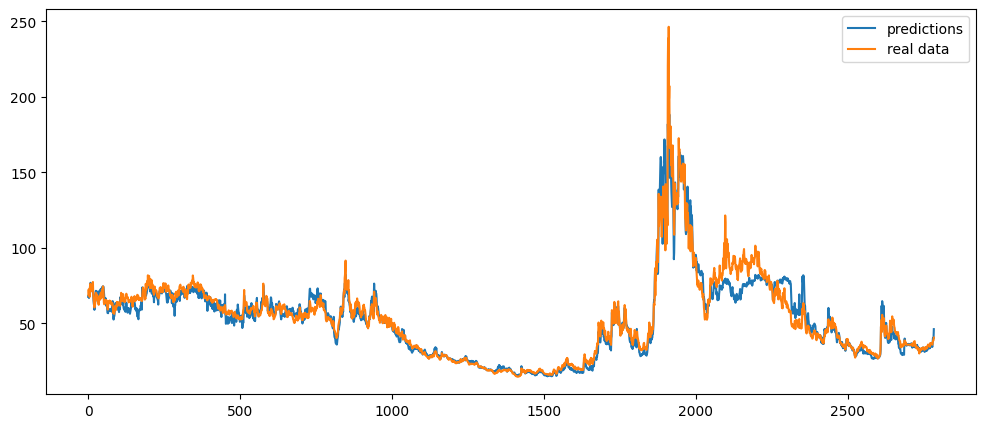

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step


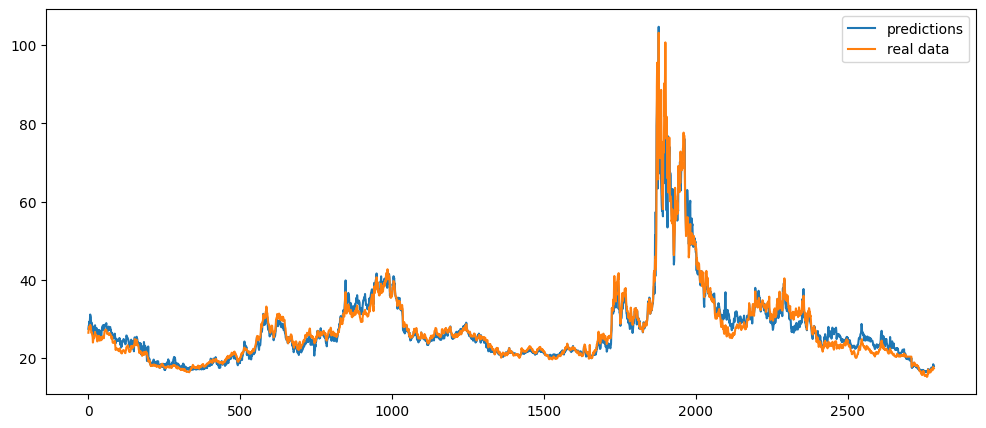

-----------
latent space dimension is 4
-----------
Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - kl_loss: 5.2356e-05 - reconstruction_loss: 14.5000 - total_loss: 14.4998
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 2.6660e-06 - reconstruction_loss: 11.6778 - total_loss: 11.6776
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0011 - reconstruction_loss: 11.4925 - total_loss: 11.4933    
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0066 - reconstruction_loss: 11.1814 - total_loss: 11.1877
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0071 - reconstruction_loss: 11.1220 - total_loss: 11.1289
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0069 - reconstruction_loss: 11.1097 - total_loss: 11.1163
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0064 - reconstruction_loss: 11.1000 - total_loss: 11.1062
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0065 - rec

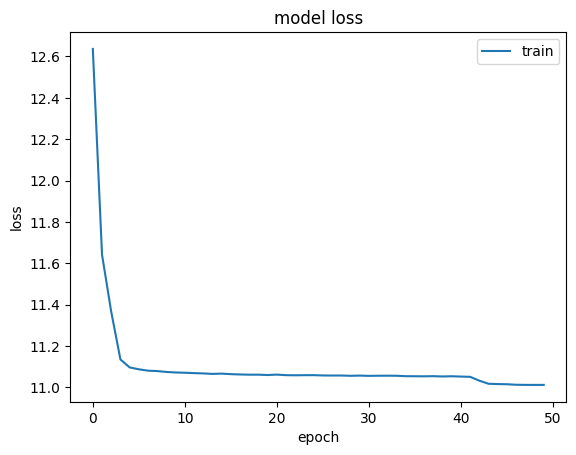

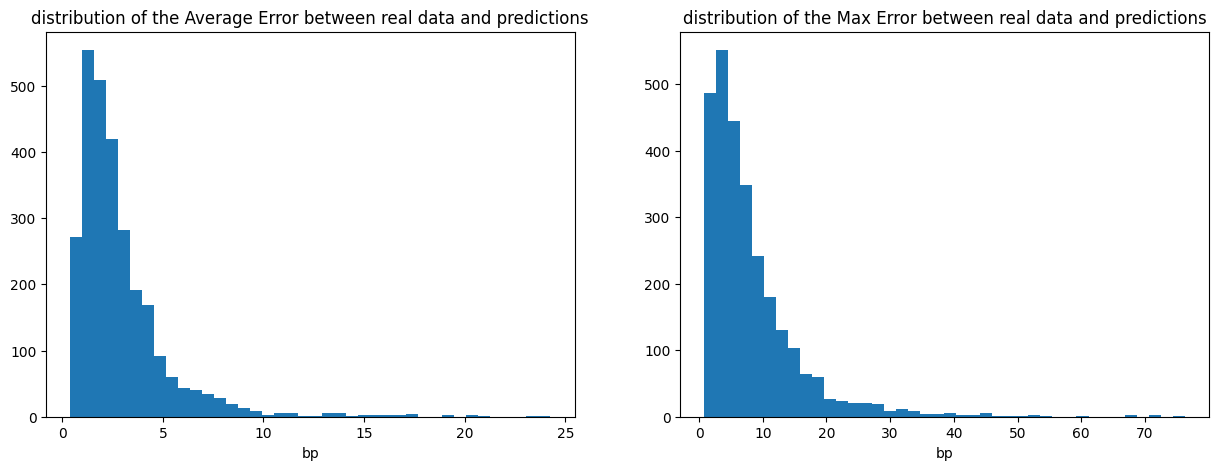

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step


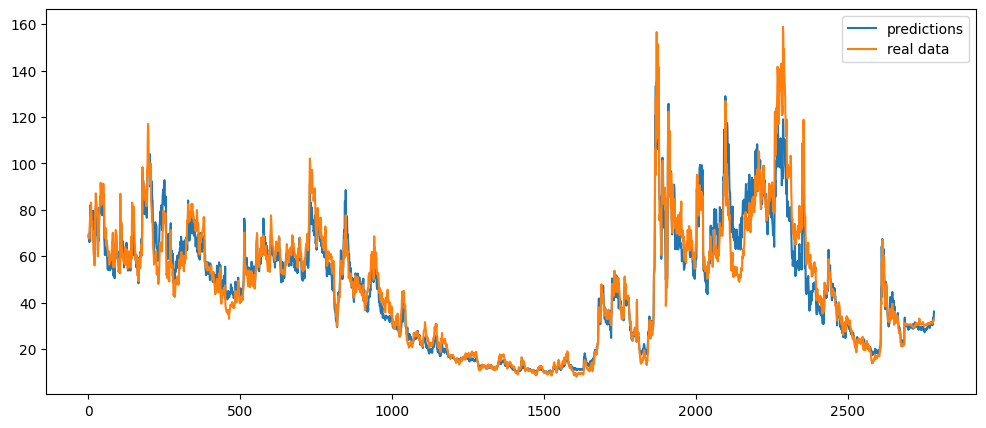

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step


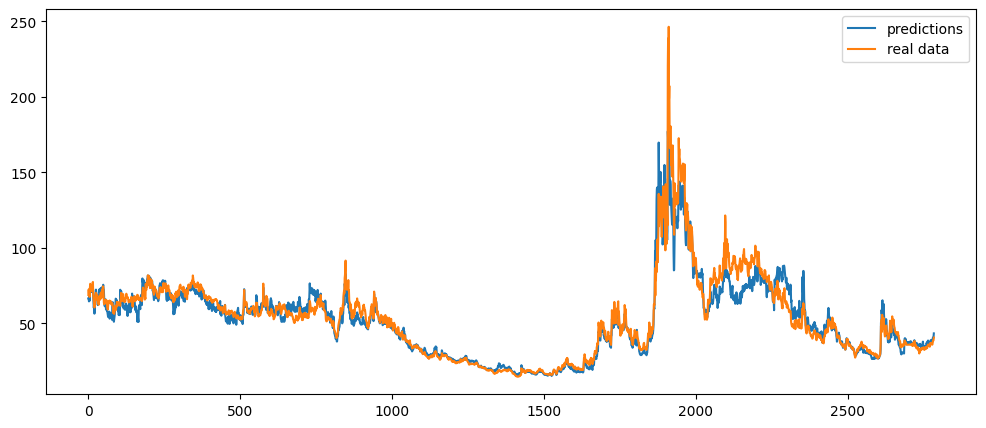

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step


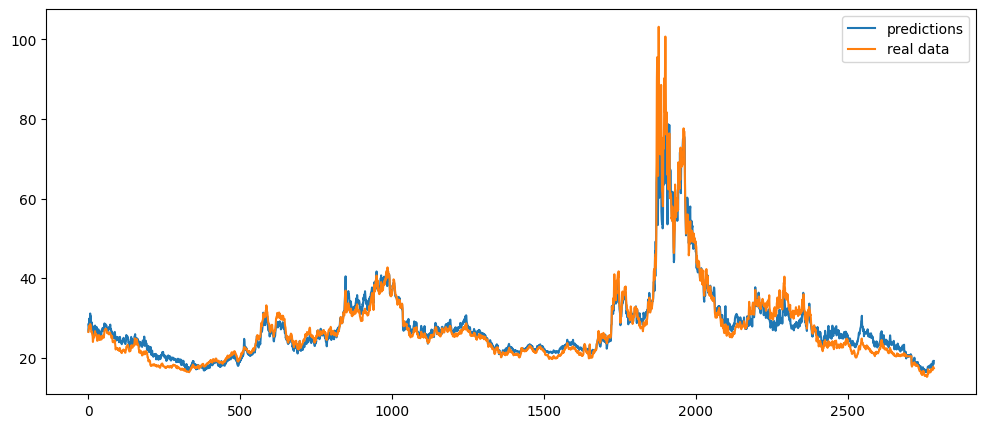

-----------
latent space dimension is 5
-----------
Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - kl_loss: 2.6017e-05 - reconstruction_loss: 14.5009 - total_loss: 14.5006
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 6.0517e-05 - reconstruction_loss: 11.6107 - total_loss: 11.6105
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0016 - reconstruction_loss: 11.1963 - total_loss: 11.1977  
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0047 - reconstruction_loss: 11.0971 - total_loss: 11.1015
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0050 - reconstruction_loss: 11.0922 - total_loss: 11.0969
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0048 - reconstruction_loss: 11.0926 - total_loss: 11.0971
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0047 - reconstruction_loss: 11.0904 - total_loss: 11.0949
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0049 - recon

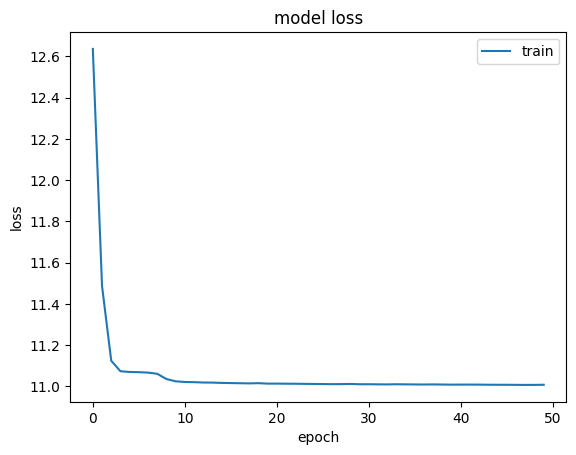

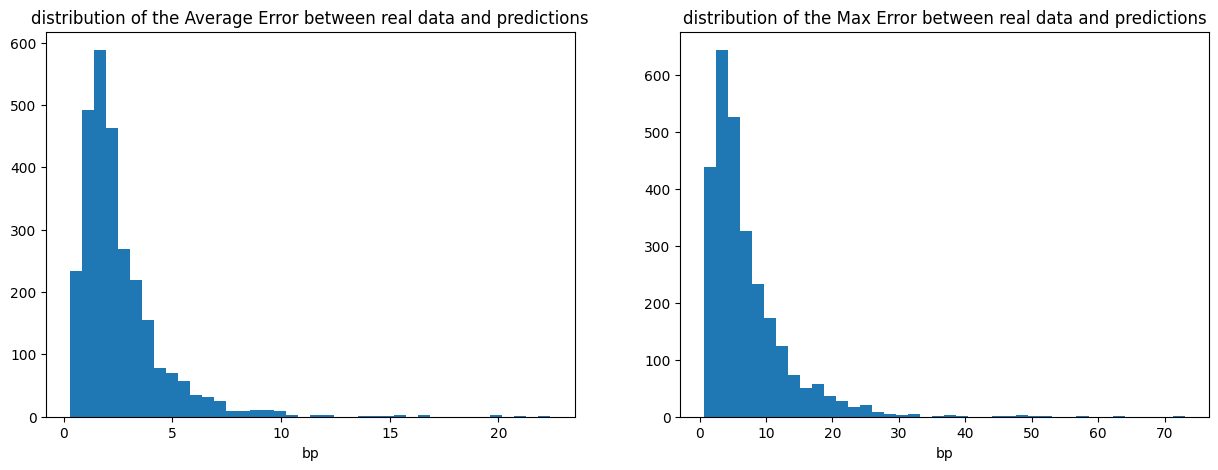

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step


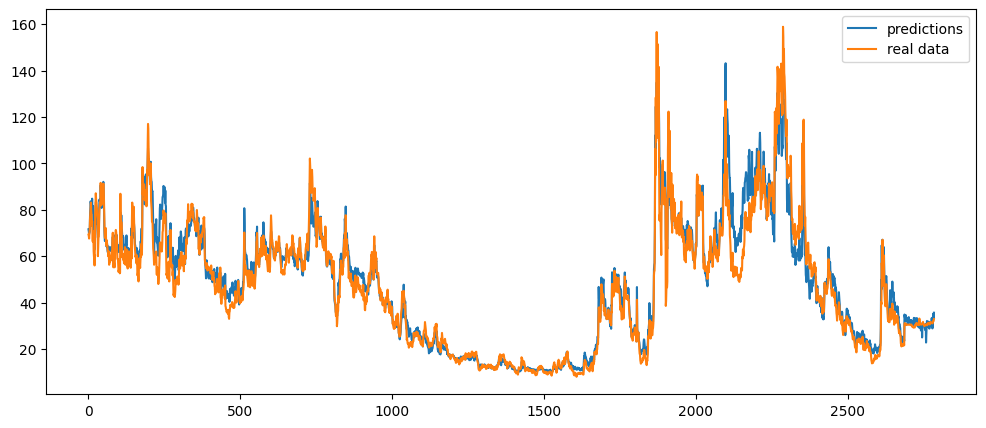

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


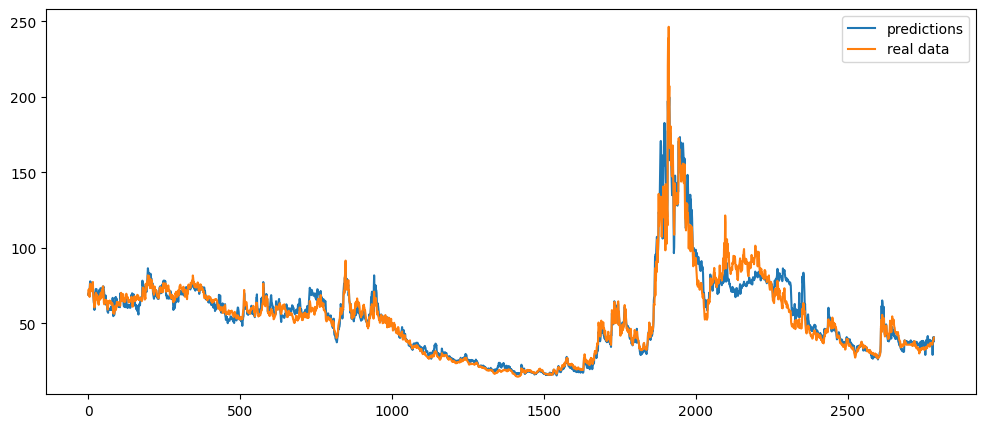

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step


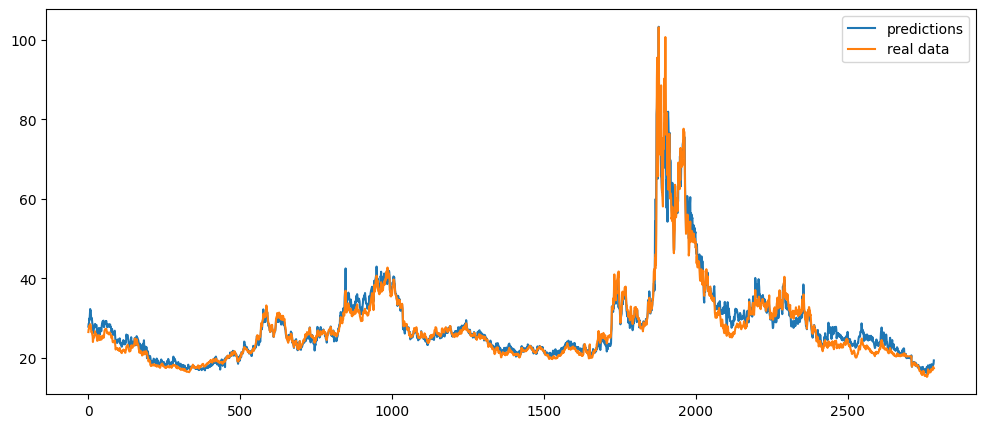

-----------
latent space dimension is 6
-----------
Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - kl_loss: 1.0585e-06 - reconstruction_loss: 14.5294 - total_loss: 14.5291
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 1.2757e-04 - reconstruction_loss: 11.6004 - total_loss: 11.6003
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0020 - reconstruction_loss: 11.1376 - total_loss: 11.1393
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0037 - reconstruction_loss: 11.0991 - total_loss: 11.1026
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0038 - reconstruction_loss: 11.0934 - total_loss: 11.0969
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0040 - reconstruction_loss: 11.0905 - total_loss: 11.0943
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0038 - reconstruction_loss: 11.0864 - total_loss: 11.0899
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0044 - reconst

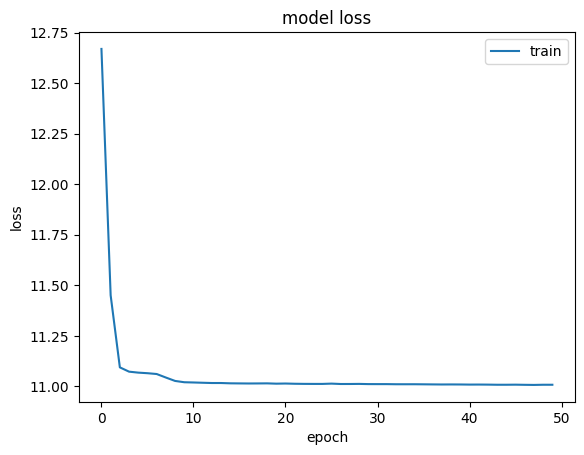

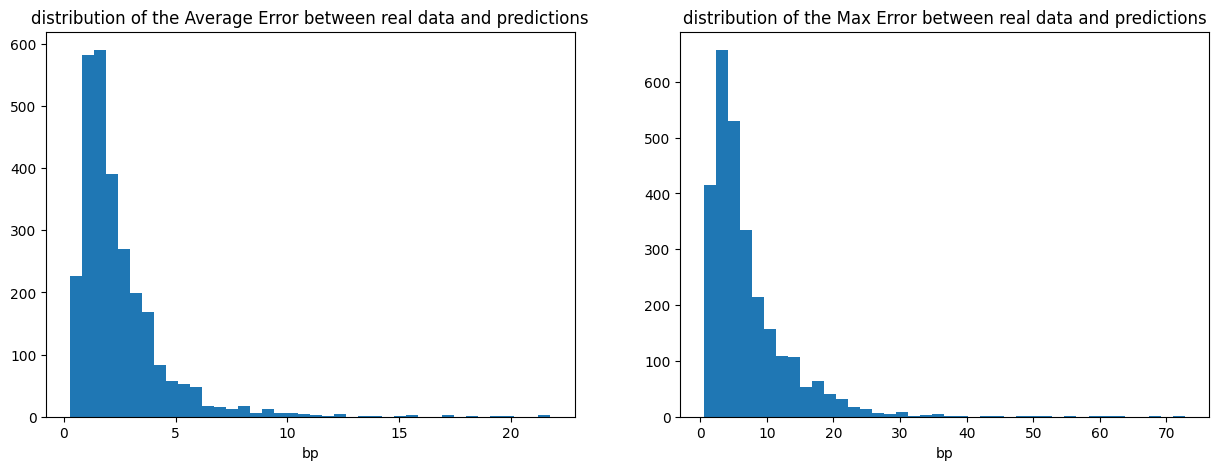

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step


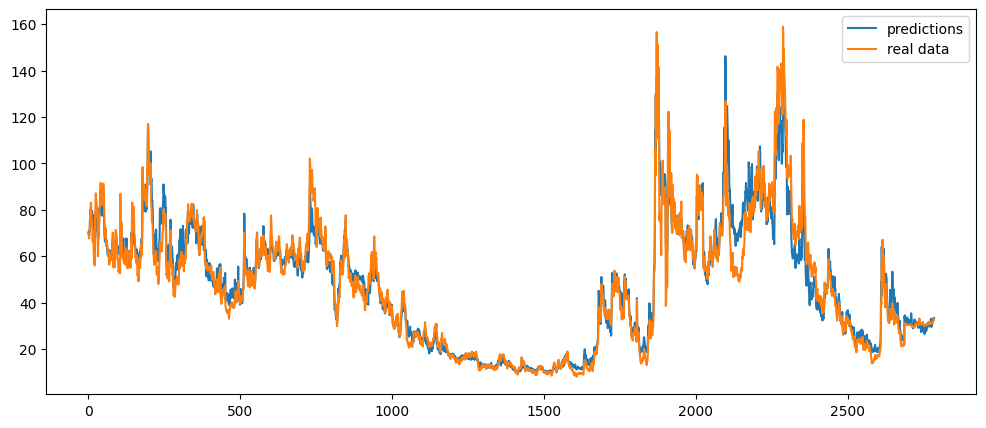

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step


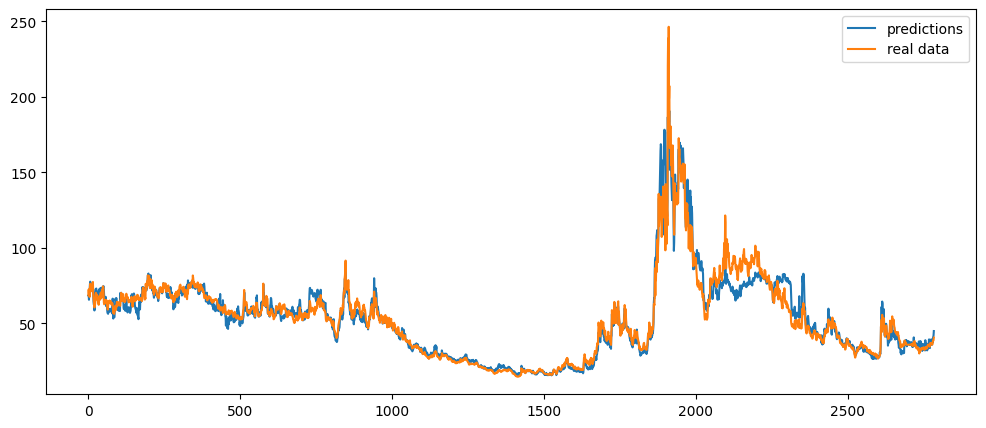

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step


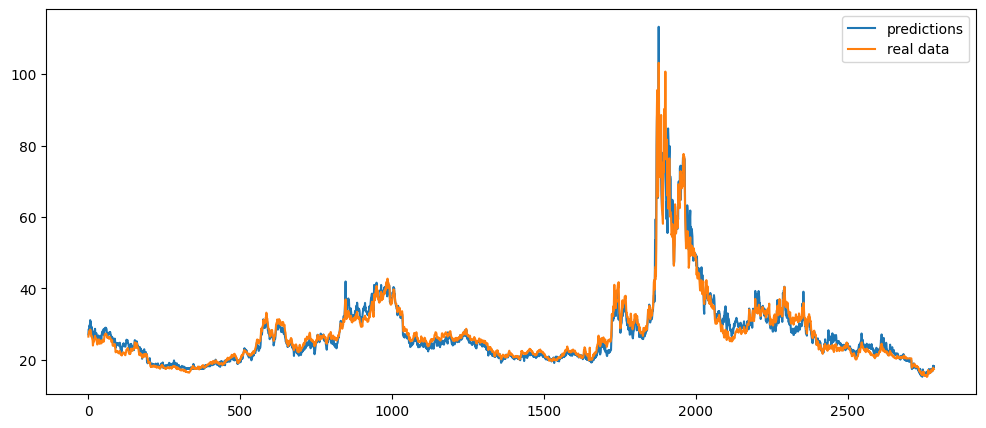

-----------
latent space dimension is 7
-----------
Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - kl_loss: 1.5835e-05 - reconstruction_loss: 14.5269 - total_loss: 14.5266
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 2.4196e-05 - reconstruction_loss: 11.6700 - total_loss: 11.6698
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0017 - reconstruction_loss: 11.2840 - total_loss: 11.2854
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0046 - reconstruction_loss: 11.1051 - total_loss: 11.1094
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - kl_loss: 0.0053 - reconstruction_loss: 11.0925 - total_loss: 11.0975
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - kl_loss: 0.0052 - reconstruction_loss: 11.0890 - total_loss: 11.0939
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0052 - reconstruction_loss: 11.0859 - total_loss: 11.0909
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0055 - reconst

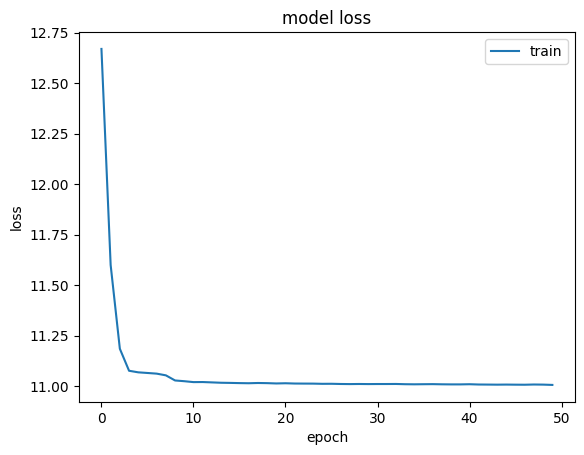

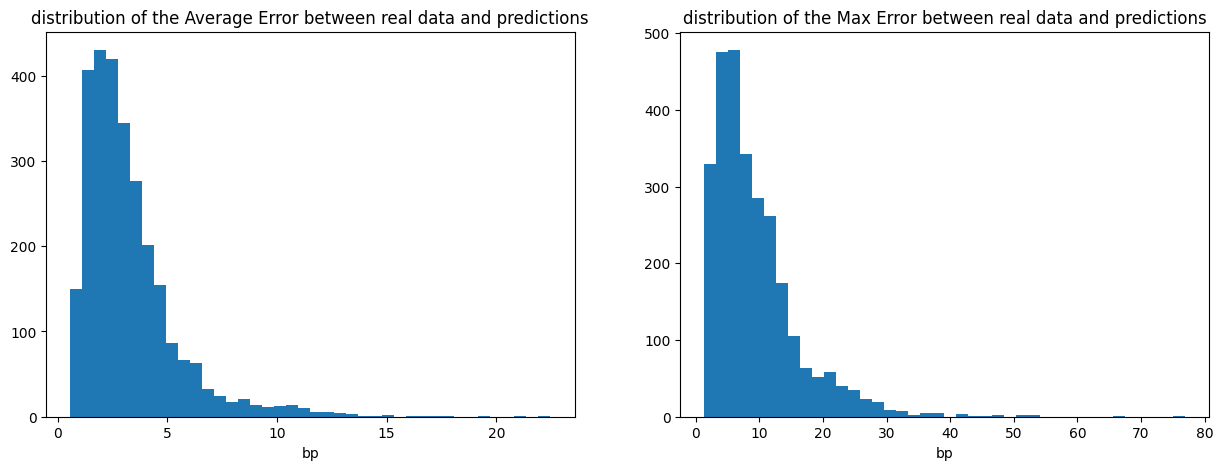

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step


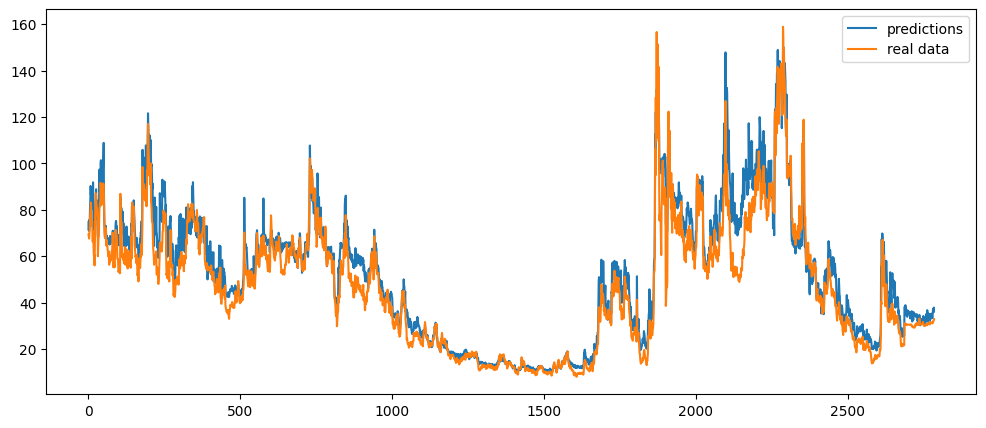

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step


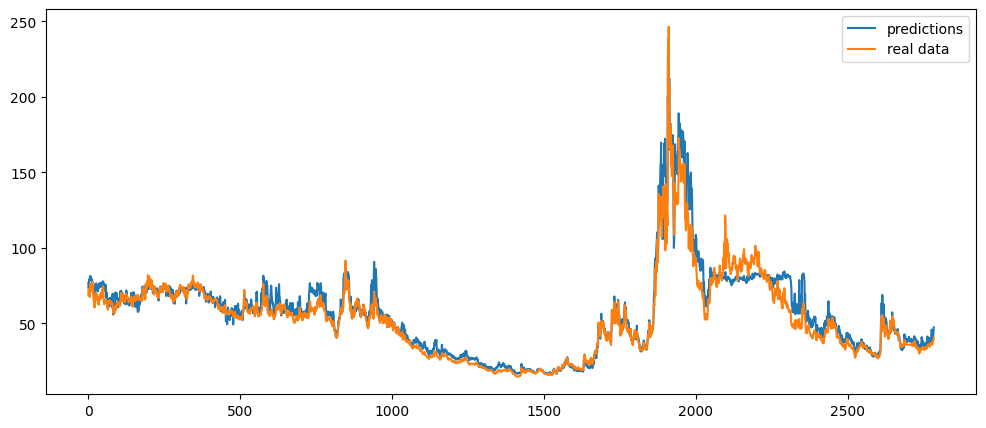

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step


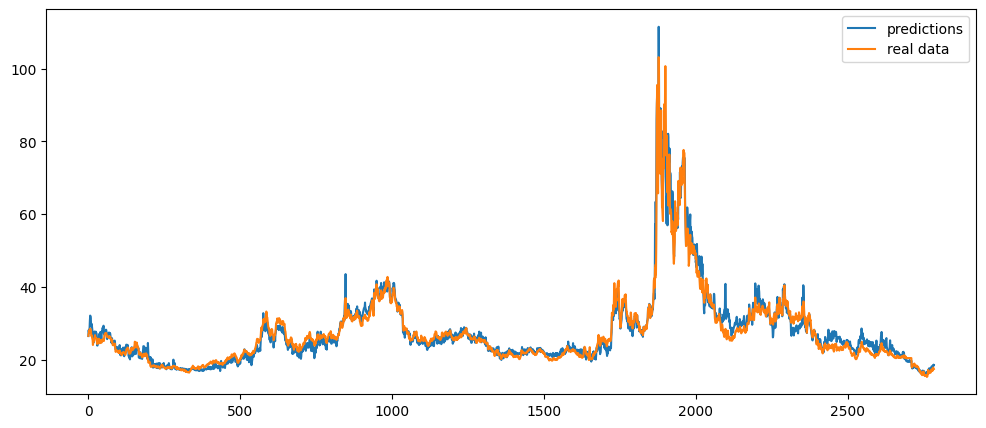

-----------
latent space dimension is 8
-----------
Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - kl_loss: 5.7316e-05 - reconstruction_loss: 14.4795 - total_loss: 14.4793
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 5.3339e-05 - reconstruction_loss: 11.6786 - total_loss: 11.6785
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0034 - reconstruction_loss: 11.2334 - total_loss: 11.2366
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0088 - reconstruction_loss: 11.0992 - total_loss: 11.1078
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0081 - reconstruction_loss: 11.0927 - total_loss: 11.1005
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0074 - reconstruction_loss: 11.0889 - total_loss: 11.0960
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0070 - reconstruction_loss: 11.0875 - total_loss: 11.0942
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0065 - reconst

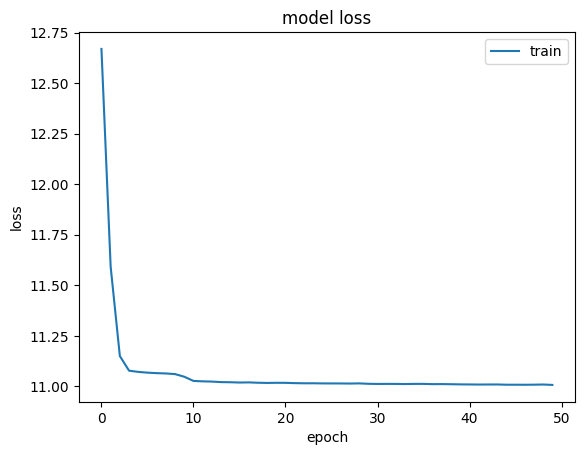

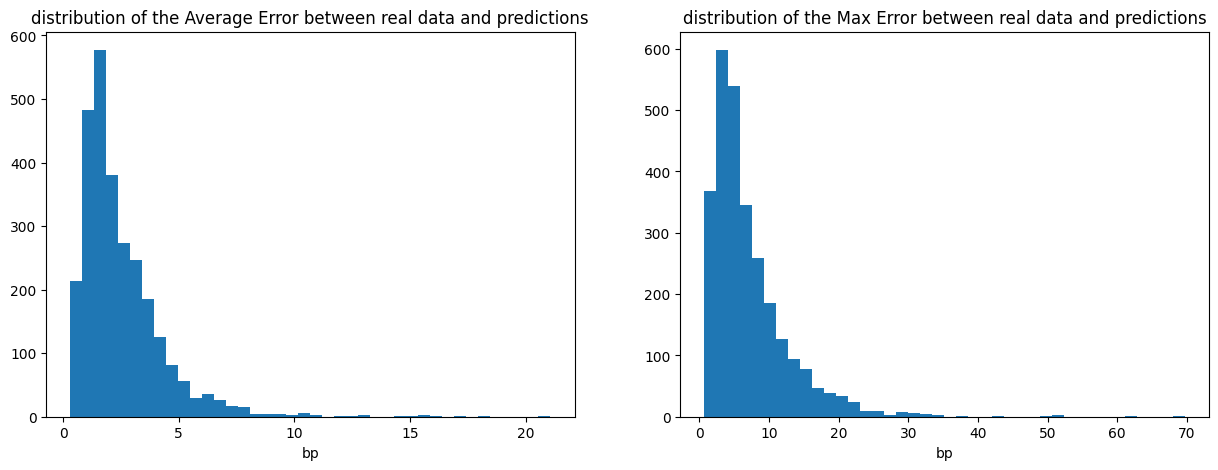

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step


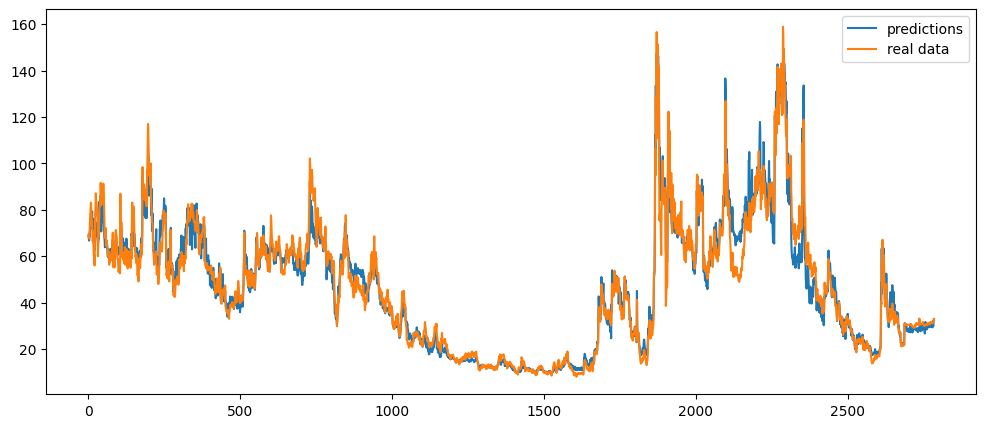

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step


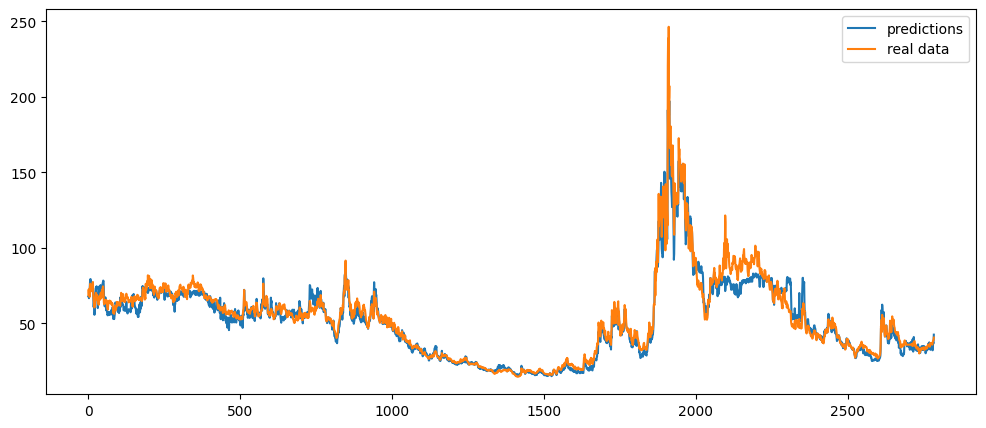

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step


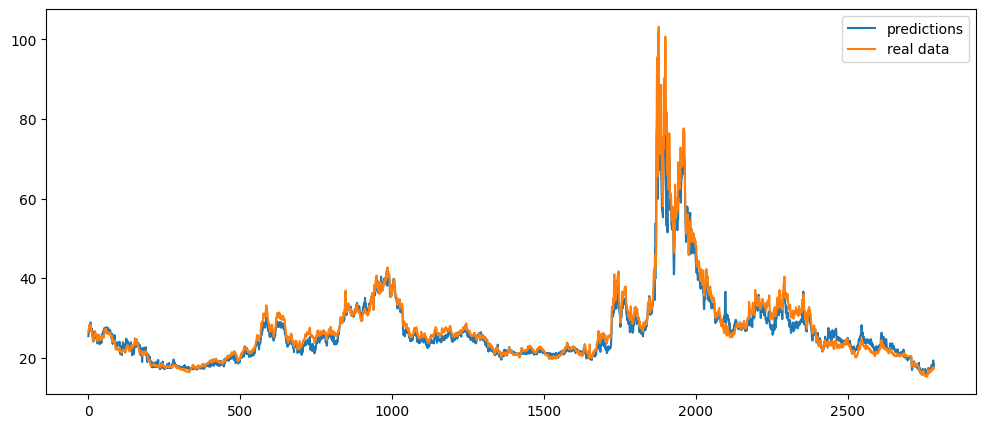

-----------
latent space dimension is 9
-----------
Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - kl_loss: 1.1082e-05 - reconstruction_loss: 14.5326 - total_loss: 14.5323
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - kl_loss: 2.5346e-04 - reconstruction_loss: 11.6184 - total_loss: 11.6184
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0054 - reconstruction_loss: 11.2149 - total_loss: 11.2201
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0109 - reconstruction_loss: 11.1026 - total_loss: 11.1132
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0098 - reconstruction_loss: 11.0919 - total_loss: 11.1014
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0099 - reconstruction_loss: 11.0652 - total_loss: 11.0749
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0102 - reconstruction_loss: 11.0497 - total_loss: 11.0597
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - kl_loss: 0.0097 - reconst

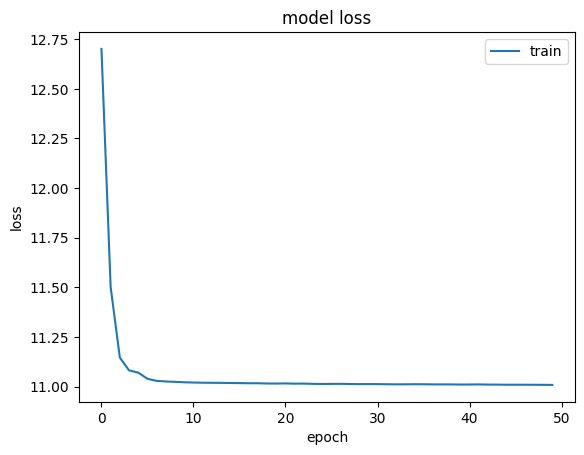

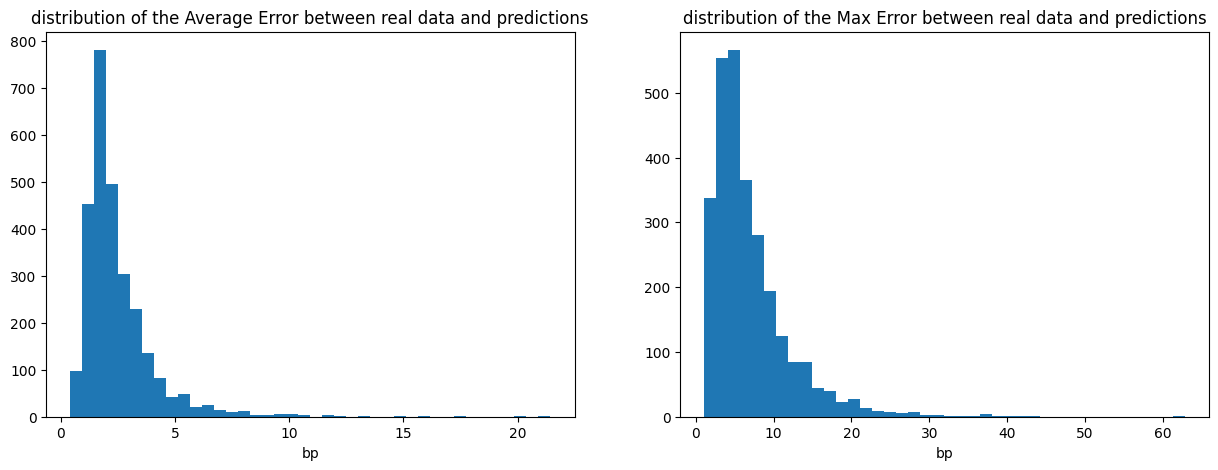

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step


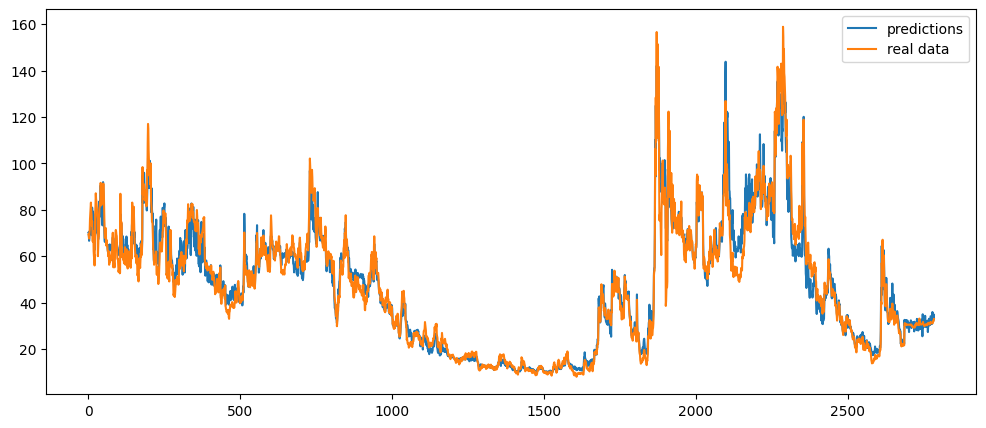

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step


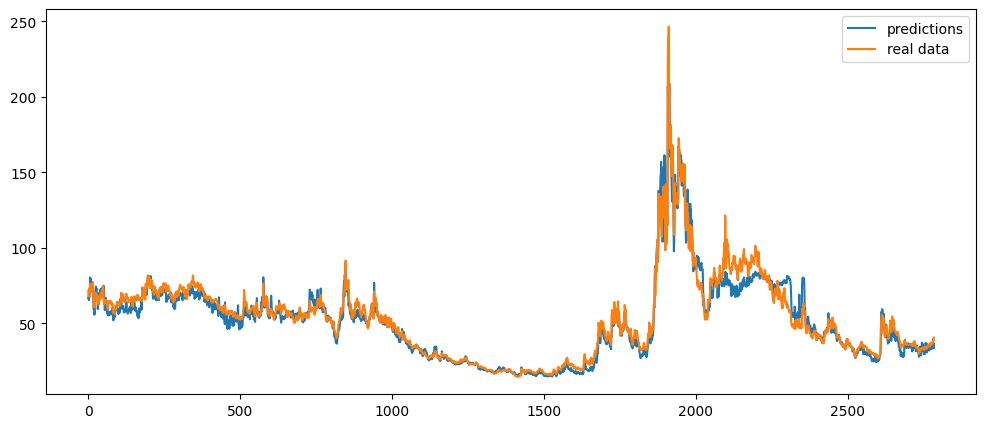

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step


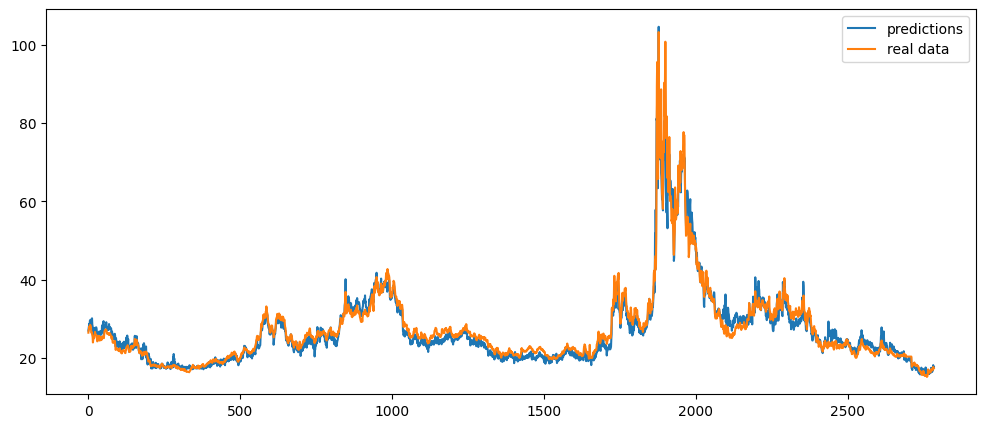

In [2]:

from src.visualization.plot_history_of_losses import plot_history_of_losses
from src.visualization.vol.error_histograms import error_histograms
import matplotlib.pyplot as plt


lat_space = range(1, 10)

for i, lat_val in enumerate(lat_space):
    print('-----------')
    print(f"latent space dimension is {lat_val}")
    print('-----------')
    vae = VaeVanilla(input_shape=data_norm.shape[1:],
                    hidden_layers_nodes=[192, 96, 48, 24, 12, 6],
                    latent_space_dim=lat_val,
                    loss_type='mse',
                    beta=0.0002)
    vae.compile(optimizer='adam')
    history = vae.fit(data_norm, 
                      epochs=50, 
                      batch_size=16)  # add validation_data=x_test
        
    plot_history_of_losses(history)  

    error_histograms(vae,
                     data,
                     normalizer)
    
    N1 = 0  # indexes of data dimension
    N2 = 0  # indexes of data dimension

    predictions = normalizer.denormalize(vae.predict(x=data_norm))
    plt.figure(figsize=(12,5))
    plt.plot(predictions[:, N1, N2], label='predictions')
    plt.plot(data[:, N1, N2], label='real data')
    plt.legend()
    plt.show()

    N1 = 2  # indexes of data dimension
    N2 = 0  # indexes of data dimension

    predictions = normalizer.denormalize(vae.predict(x=data_norm))
    plt.figure(figsize=(12,5))
    plt.plot(predictions[:, N1, N2], label='predictions')
    plt.plot(data[:, N1, N2], label='real data')
    plt.legend()
    plt.show()

    N1 = 5  # indexes of data dimension
    N2 = 4  # indexes of data dimension

    predictions = normalizer.denormalize(vae.predict(x=data_norm))
    plt.figure(figsize=(12,5))
    plt.plot(predictions[:, N1, N2], label='predictions')
    plt.plot(data[:, N1, N2], label='real data')
    plt.legend()
    plt.show()